In [1]:
import numpy as np

In [2]:
import sys
sys.path.append('./')
import tropomi
import pandas as pd
import numpy as np
import xarray as xr
from glob import glob
import matplotlib.pyplot as plt
import yaml

In [35]:
# open config file
with open('config.yml', 'r') as file:
    cfg = yaml.safe_load(file)

startdate = str(cfg['startdate'])
enddate = str(cfg['enddate'])
gc_cache = str(cfg['gc_cache'])
tropomidir = str(cfg['tropomidir'])
trversion = str(cfg['trversion'])
trkind = cfg['trkind'] #list
datadir = str(cfg['datadir'])
outfile = str(cfg['outfile'])
pedge_cache = str(cfg['pedge_cache'])
blended = bool(cfg['blended'])

gc_startdate = pd.to_datetime(startdate,format='%Y%j')
gc_enddate = pd.to_datetime(enddate,format='%Y%j')

In [36]:
tdate = pd.date_range('2019-01-01','2019-02-01')[15]

In [37]:
import os.path

In [38]:
os.path.isfile(tdate.strftime(f'{datadir}/v05OH/{outfile}'))

True

In [34]:
tdate.strftime(f'{datadir}/v05OH/{outfile}')

'/n/holyscratch01/jacob_lab/jeast/gc-OH-runs-3/tropomi_gridded/v05OH/TROPOMI_GC_XCH4_L3_RPRO_020400_20190116.nc'

In [26]:
outfs = []
# save daily file
for tdate in pd.date_range(gc_startdate,gc_enddate)[:-1]:
    print(f'\n\n----> Processing {tdate.strftime("%Y-%m-%d")} <----',flush=True)

    # get the lat/lons of gc gridcells
    gc_lat_lon = tropomi.get_gc_lat_lon(gc_cache, tdate)

    # all swaths for today
    tpat = f'{tropomidir}/*{tdate.strftime("%Y%m%d")}*.nc'
    tpaths = sorted(glob(tpat))
    # remove if not day of interest 
    for f in tpaths:
        datestr = tdate.strftime('%Y%m%d')
        dstart = f.split('_')[-5]
        dend = f.split('_')[-6]
        myversion = f.split('_')[-2]
        mykind = f.split('_')[-13]
        if (
            ((datestr in dstart) | (datestr in dend )) &
            (mykind in trkind) &
            (myversion in trversion)
        ):
            continue
        else:
            print(f'skipping {f}',flush=True)
            tpaths = [myf for myf in tpaths if myf != f]

    # grid each swath
    tfs = []
    for f in tpaths:
        print(f,flush=True)
        tf = tropomi.apply_average_tropomi_operator(
            filename = f,
            blended = blended,
            n_elements = None,
            gc_startdate = tdate,
            gc_enddate = tdate + pd.Timedelta('1D'),
            xlim = np.array([-180,180]),
            ylim = np.array([-90,90]),
            gc_cache = gc_cache,
            pedge_cache = pedge_cache
        )
        tfs.append(tf)
        print('\n',flush=True)

    # convert to xarray dataset
    dslist = [tropomi.accumulate_to_dataset(obs['obs_GC'],gc_lat_lon) for obs in tfs]
    # strip Nones
    dslist = [ds for ds in dslist if ds is not None]

    # merge
    outfs.append(xr.merge(dslist,compat='no_conflicts'))



----> Processing 2019-12-30 <----
/n/holylfs05/LABS/jacob_lab/imi/ch4/blended/S5P_BLND_L2__CH4____20191229T234917_20191230T013047_11458_03_020400_20230407T142308.nc
Found 12332 TROPOMI observations.
177


/n/holylfs05/LABS/jacob_lab/imi/ch4/blended/S5P_BLND_L2__CH4____20191230T013047_20191230T031217_11459_03_020400_20230407T141552.nc
Found 6375 TROPOMI observations.
192


/n/holylfs05/LABS/jacob_lab/imi/ch4/blended/S5P_BLND_L2__CH4____20191230T031217_20191230T045347_11460_03_020400_20230407T141635.nc
Found 23389 TROPOMI observations.
235


/n/holylfs05/LABS/jacob_lab/imi/ch4/blended/S5P_BLND_L2__CH4____20191230T045347_20191230T063517_11461_03_020400_20230407T141857.nc
Found 53218 TROPOMI observations.
392


/n/holylfs05/LABS/jacob_lab/imi/ch4/blended/S5P_BLND_L2__CH4____20191230T063517_20191230T081647_11462_03_020400_20230407T142419.nc
Found 53961 TROPOMI observations.
397


/n/holylfs05/LABS/jacob_lab/imi/ch4/blended/S5P_BLND_L2__CH4____20191230T081647_20191230T095817_11463_03_02040

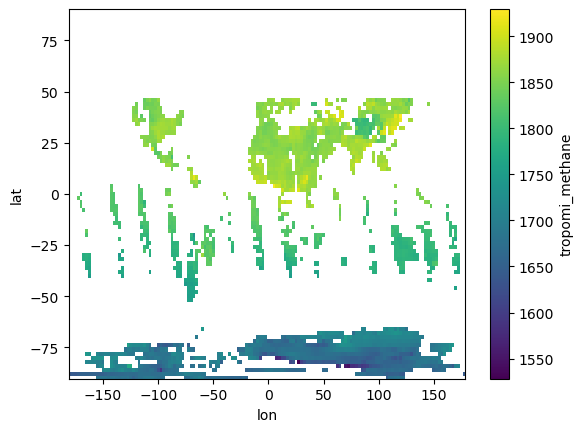

In [27]:
outfs[0].tropomi_methane.mean('time').plot()

In [6]:
# open config file
with open('config.yml', 'r') as file:
    cfg = yaml.safe_load(file)

startdate = str(cfg['startdate'])
enddate = str(cfg['enddate'])
gc_cache = str(cfg['gc_cache'])
tropomidir = '/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/'
trversion = str(cfg['trversion'])
trkind = ['RPRO'] #list
datadir = str(cfg['datadir'])
outfile = str(cfg['outfile'])
pedge_cache = str(cfg['pedge_cache'])
blended = False

gc_startdate = pd.to_datetime(startdate,format='%Y%j')
gc_enddate = pd.to_datetime(enddate,format='%Y%j')

In [7]:
outfs2 = []
# save daily file
for tdate in pd.date_range(gc_startdate,gc_enddate)[:-1]:
    print(f'\n\n----> Processing {tdate.strftime("%Y-%m-%d")} <----',flush=True)

    # get the lat/lons of gc gridcells
    gc_lat_lon = tropomi.get_gc_lat_lon(gc_cache, tdate)

    # all swaths for today
    tpat = f'{tropomidir}/*{tdate.strftime("%Y%m%d")}*.nc'
    tpaths = sorted(glob(tpat))
    # remove if not day of interest 
    for f in tpaths:
        datestr = tdate.strftime('%Y%m%d')
        dstart = f.split('_')[-5]
        dend = f.split('_')[-6]
        myversion = f.split('_')[-2]
        mykind = f.split('_')[-13]
        if (
            ((datestr in dstart) | (datestr in dend )) &
            (mykind in trkind) &
            (myversion in trversion)
        ):
            continue
        else:
            print(f'skipping {f}',flush=True)
            tpaths = [myf for myf in tpaths if myf != f]

    # grid each swath
    tfs = []
    for f in tpaths:
        print(f,flush=True)
        tf = tropomi.apply_average_tropomi_operator(
            filename = f,
            blended = blended,
            n_elements = None,
            gc_startdate = tdate,
            gc_enddate = tdate + pd.Timedelta('1D'),
            xlim = np.array([-180,180]),
            ylim = np.array([-90,90]),
            gc_cache = gc_cache,
            pedge_cache = pedge_cache
        )
        tfs.append(tf)
        print('\n',flush=True)

    # convert to xarray dataset
    dslist = [tropomi.accumulate_to_dataset(obs['obs_GC'],gc_lat_lon) for obs in tfs]
    # strip Nones
    dslist = [ds for ds in dslist if ds is not None]

    # merge
    outfs2.append(xr.merge(dslist,compat='no_conflicts'))



----> Processing 2019-01-01 <----
/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20181231T235559_20190101T013729_06308_03_020400_20221118T030539.nc
Found 9692 TROPOMI observations.
277


/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T013729_20190101T031859_06309_03_020400_20221118T031702.nc
Found 7133 TROPOMI observations.
229


/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T031859_20190101T050029_06310_03_020400_20221118T031704.nc
Found 38363 TROPOMI observations.
379


/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T050029_20190101T064159_06311_03_020400_20221118T031705.nc
Found 34722 TROPOMI observations.
408


/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T064159_20190101T082329_06312_03_020400_20221118T031707.nc
Found 54627 TROPOMI observations.
529


/n/holylfs05/LABS/jacob_lab/imi/ch4/tropomi/S5P_RPRO_L2__CH4____20190101T082329_20190101T100459_06313_03_020400

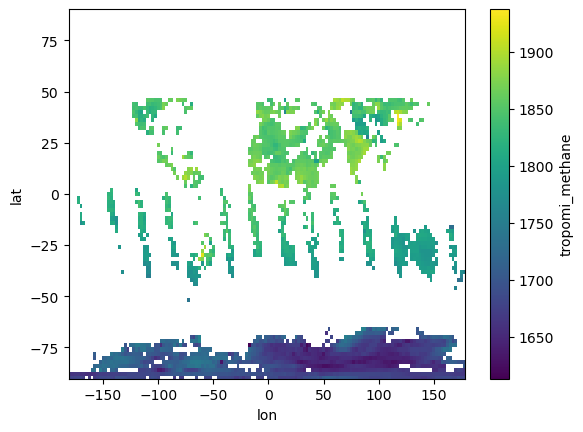

In [8]:
outfs2[0].tropomi_methane.mean('time').plot()

In [9]:
outfs2[0].observation_count.sum().values

array(385870.00022788)

In [10]:
outfs[0].observation_count.sum().values

array(384298.00011678)

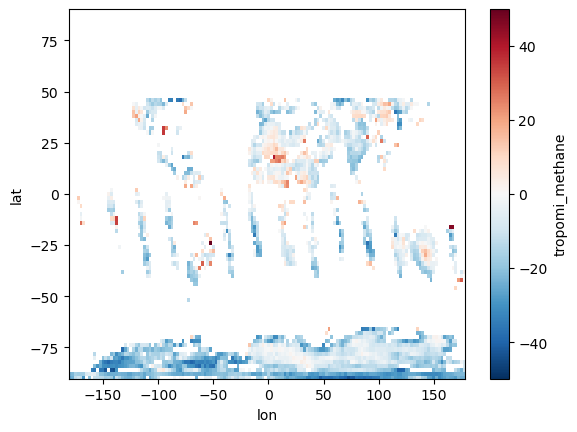

In [15]:
(outfs[0].tropomi_methane - outfs2[0].tropomi_methane).mean('time').plot()

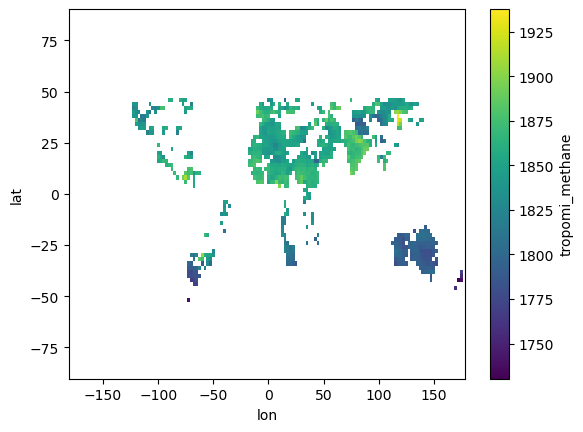

In [35]:
outfs2[0].tropomi_methane.mean('time').plot()

In [41]:
outfs2[0].observation_count.sum().values

array(151710.00008796)